# Machine Learning Pre-requisite Assignment

###### Answer 1:

If we multiply a matrix A with n rows and k columns with a matrix B with k rows and m columns, we get the result matrix with n rows and m columns. It is because when we multiply each row of A with each column of B we will get n.m elements in the final matrix. 

If we write down the values of all the elements of the result matrix, we will see that each element is the sum of k pairs where each pair is the product of two elements (one from ith row of A and one from ith column of B). Hence there are k multiplications in each entry of result matrix. As I said before there are n.m entries in the result matrix. Therefore we can conclude that there are n.k.m multiplications in the matrix multiplications of A and B.

As I said that each element is the sum of "k pairs", we can say that there will be k-1 additions in all the entries of result matrix. If there n.m entries in the result then there will be a total of n.m.(k-1) additions in the matrix multiplication of A and B.

###### Answer 2:

In [57]:
# Using list of lists
import timeit
import statistics as st
import random

print("Enter the values of n, k and m:")
n = int(input())
k = int(input())
m = int(input())

def matrix_multiplication(n, k, m):
    matrix1 = []

    for i in range(n):
        temp = []
        for j in range(k):
            temp.append(random.randint(-2147483648, 2147483647))
        matrix1.append(temp)

    matrix2 = []

    for i in range(k):
        temp = []
        for j in range(m):
            temp.append(random.randint(-2147483648, 2147483647))
        matrix2.append(temp)



    result = [[0 for x in range(m)] for y in range(n)]

    begin = timeit.default_timer()
    # iterate through rows of matrix1
    for i in range(len(matrix1)):
        # iterate through columns of matrix2
        for j in range(len(matrix2[0])):
            # iterate through rows of matrix2
            for h in range(len(matrix2)):
                result[i][j] += matrix1[i][h] * matrix2[h][j]
    end = timeit.default_timer()
    elapsed_time = round((end - begin) * 10 ** 6, 3)
    return elapsed_time

timetaken = []
def get_avg(arr):
    sumi = 0
    for i in range(len(arr)):
        sumi = sumi + arr[i]
    return sumi/len(arr)

for i in range(1000):
    time = matrix_multiplication(n, k, m)
    timetaken.append(time)

avg = get_avg(timetaken)
print("The average time taken: ", avg, "μs")
print("Standard deviation: ", st.stdev(timetaken), "μs")

Enter the values of n, k and m:
32
64
80
The average time taken:  50792.30642900011 μs
Standard deviation:  2913.0012530736253 μs


In [58]:
# Using numpy
import timeit
import numpy as np
import statistics as st
import random 

print("Enter the values of n, k and m:")
n = int(input())
k = int(input())
m = int(input())

def matrix_multiplication(n, k, m):
    
    entries1 = []
    for i in range(n*k):
      entries1.append(random.randint(-2147483648, 2147483647))
    matrix1 = np.array(entries1).reshape(n, k)

    entries2 = []
    for i in range(k*m):
      entries2.append(random.randint(-2147483648, 2147483647))
    matrix2 = np.array(entries2).reshape(k, m)

    begin = timeit.default_timer()
    result = np.dot(matrix1, matrix2)
    end = timeit.default_timer()

    elapsed_time = round((end - begin) * 10 ** 6, 3)
    return elapsed_time

timetaken = []
def get_avg(arr):
    sumi = 0
    for i in range(len(arr)):
        sumi = sumi + arr[i]
    return sumi/len(arr)

for i in range(1000):
    time = matrix_multiplication(n, k, m)
    timetaken.append(time)

avg = get_avg(timetaken)
print("The average time taken: ", avg, "μs")
print("Standard deviation: ", st.stdev(timetaken), "μs")

Enter the values of n, k and m:
32
64
80
The average time taken:  235.678882 μs
Standard deviation:  321.04956910911005 μs


As we can see, the time in NumPy is 100 times lesser, making it quicker than the list of lists technique. This is because Numpy is built in C and translates its internal data to ctypes. Lists, unlike NumPy, do not provide "vectorized" operations such as element-wise addition and multiplication. Since they might include objects of various types, Python must maintain type information for each element and run type dispatching code when working on each member. To conclude, vectorized operations in Numpy are translated to highly optimized C code, making them far quicker than their standard Python equivalents.

[Referred from StackOverflow article on this topic](https://stackoverflow.com/questions/42227432/why-is-it-that-np-dot-is-so-much-faster-than-finding-the-dot-product-using-for-l#:~:text=Because%20np.,faster%20than%20the%20Python%20interpreter)

###### Answer 3:

In [59]:
import timeit
import statistics as st
import random 

def brute_median(A):
  begin = timeit.default_timer()
  n = len(A)
  l = n // 2
  largest = -2454635434
  for i in range(0, n):
    largest = max(largest, A[i])

  for i in range(l):
    maxi = -2454635434
    last = largest
    for j in range(n):
      if(A[j] > maxi and A[j] < largest):
        maxi = A[j]
    largest = maxi
  if n % 2 == 0:
    median = (largest + last) / 2
  else:
    median = largest
  #return median
  end = timeit.default_timer()
  elapsed_time = round((end - begin) * 10 ** 6, 3)
  return elapsed_time

print("Please enter the length of the array:") 
n = int(input())
entries = []
for i in range(n):
  entries.append(random.randint(-2147483648, 2147483647))

#arr = [ 5, 10, 1, 3, 4, 19, 9, 2]
#print(brute_median(arr))

for i in range(1000):
    time = brute_median(entries)
    timetaken.append(time)

avg = get_avg(timetaken)
print("The average time taken: ", avg, "μs")
print("Standard deviation: ", st.stdev(timetaken), "μs")

Please enter the length of the array:
10
The average time taken:  126.35672749999996 μs
Standard deviation:  253.0671023189389 μs


In [60]:
import timeit
import statistics as st
import random 

def find_median(lst):
  begin = timeit.default_timer()
  lst.sort()
  if len(lst) % 2 == 1:
    median = lst[len(lst) // 2]
  else:
    median = (lst[len(lst) // 2 - 1] + lst[len(lst) // 2]) / 2
  #return median
  end = timeit.default_timer()
  elapsed_time = round((end - begin) * 10 ** 6, 3)
  return elapsed_time

print("Please enter the length of the array:") 
n = int(input())
entries = []
for i in range(n):
  entries.append(random.randint(-2147483648, 2147483647))

#arr = [ 5, 10, 1, 3, 4, 19, 9, 2]
#print(find_median(arr))

for i in range(1000):
    time = find_median(entries)
    timetaken.append(time)

avg = get_avg(timetaken)
print("The average time taken: ", avg, "μs")
print("Standard deviation: ", st.stdev(timetaken), "μs")

Please enter the length of the array:
10
The average time taken:  84.59911366666657 μs
Standard deviation:  214.88806308830658 μs


In [61]:
import timeit
import statistics as st
import random 

def quickselect(lst, k):
  if not 0 <= k < len(lst):
    return None

  pivot = lst[len(lst) // 2]
  left = [x for x in lst if x < pivot]
  middle = [x for x in lst if x == pivot]
  right = [x for x in lst if x > pivot]

  if k < len(left):
    return quickselect(left, k)
  elif k < len(left) + len(middle):
    return middle[0]
  else:
    return quickselect(right, k - len(left) - len(middle))

def find_median(lst):
  begin = timeit.default_timer()
  if len(lst) % 2 == 1:
    median = quickselect(lst, len(lst) // 2)
  else:
    median = (quickselect(lst, len(lst) // 2 - 1) + quickselect(lst, len(lst) // 2)) / 2
  #return median
  end = timeit.default_timer()
  elapsed_time = round((end - begin) * 10 ** 6, 3)
  return elapsed_time

print("Please enter the length of the array:") 
n = int(input())
entries = []
for i in range(n):
  entries.append(random.randint(-2147483648, 2147483647))

#arr = [ 5, 10, 1, 3, 4, 19, 9, 2]
#print(find_median(arr))

for i in range(1000):
    time = find_median(entries)
    timetaken.append(time)

avg = get_avg(timetaken)
print("The average time taken: ", avg, "μs")
print("Standard deviation: ", st.stdev(timetaken), "μs")

Please enter the length of the array:
10
The average time taken:  71.87054949999988 μs
Standard deviation:  187.45337735973297 μs


In [62]:
import timeit
import statistics as st
import random 

def find_median(arr):
  begin = timeit.default_timer()
  median = np.median(arr)
  end = timeit.default_timer()
  #return median
  elapsed_time = round((end - begin) * 10 ** 6, 3)
  return elapsed_time

print("Please enter the length of the array:") 
n = int(input())
entries = []
for i in range(n):
  entries.append(random.randint(-2147483648, 2147483647))
#arr = [ 5, 10, 1, 3, 4, 19, 9, 2]
#print(median)

for i in range(1000):
    time = find_median(entries)
    timetaken.append(time)

avg = get_avg(timetaken)
print("The average time taken: ", avg, "μs")
print("Standard deviation: ", st.stdev(timetaken), "μs")

Please enter the length of the array:
10
The average time taken:  63.50700439999978 μs
Standard deviation:  168.63588056396983 μs


The time complexity of first approach is approximately $O(n^2)$. The time complexity of sorting approach (2nd) is $O(nlogn)$. I also learned about the quickselect approach (3rd) to find the median. It is similar to quicksort algorithm and its average time complexity is $O(n)$ and in worst case it goes to $O(n^2)$.

Now let us compare all of those to numpy.median function. We can observe that 4th approach is significantly faster than all the three approaches. It is because of the reason explained in 2nd answer.

###### Answer 4:

The gradient of $f(x,y) = x^2y + y^3sin(x)$ with respect to x is $2xy + y^3cos(x)$ and with respect to y is $x^2 + 3y^2sin(x)$

###### Answer 5:

In [34]:
import jax.numpy as np
from jax import grad, jit

def f(x, y):
    return x**2 * y + y**3 * np.sin(x)

dfdx = grad(f, 0)
dfdy = grad(f, 1)

grad_x = dfdx(1.5, 4.1)
grad_y = dfdy(1.5, 4.1)

print(grad_x) #17.175278
print(grad_y) #52.553673

17.175278
52.553673


In [28]:
import jax.numpy as np

def f(x, y):
  return 2*x*y + y**3*np.cos(x)
def g(x, y):
  return x**2 + 3*y**2*np.sin(x) 

print(f(1.5, 4.1)) #17.175278
print(g(1.5, 4.1)) #52.553673


17.175278
52.553673


As you can see, using jax and hardcoding the gradient we can check for random values of x and y that our analytical solution of gradient is correct.

###### Answer 6:

In [51]:
import sympy

x, y = sympy.symbols('x y')
f = x**2 * y + y**3 * sympy.sin(x)
gradient = sympy.Matrix([sympy.diff(f, x), sympy.diff(f, y)])

print(gradient)

gradient_at_xy = [g.evalf(subs={x: 1.5, y: 4.1}) for g in gradient] 
print(gradient_at_xy) #[17.1752786761398, 52.5536721744425]

Matrix([[2*x*y + y**3*cos(x)], [x**2 + 3*y**2*sin(x)]])
[17.1752786761398, 52.5536721744425]


###### Answer 7:

In [35]:
nested_dictionary = {"2022": {"Branch 1": {"1":{"Roll Number": 1, "Name": "N", "Marks": { "Maths": 100, "English": 70 }}}, "Branch 2": {}},
                        "2023": {"Branch 1": {},"Branch 2": {}},
                        "2024": {"Branch 1": {},"Branch 2": {}},
                        "2025": {"Branch 1": {},"Branch 2": {}}}
print(nested_dictionary)

{'2022': {'Branch 1': {'1': {'Roll Number': 1, 'Name': 'N', 'Marks': {'Maths': 100, 'English': 70}}}, 'Branch 2': {}}, '2023': {'Branch 1': {}, 'Branch 2': {}}, '2024': {'Branch 1': {}, 'Branch 2': {}}, '2025': {'Branch 1': {}, 'Branch 2': {}}}


###### Answer 8:

In [41]:
class CS_Student:
    def __init__(self,name,Rollnumber,grade1,grade2):
        self.name = name
        self.Rollnumber = Rollnumber
        self.Course1 = grade1
        self.Course2 = grade2

class EE_Student:
    def __init__(self,name,Rollnumber,grade1,grade2):
        self.name = name
        self.Rollnumber = Rollnumber
        self.Course1 = grade1
        self.Course2 = grade2

class ME_Student:
    def __init__(self,name,Rollnumber,grade1,grade2):
        self.name = name
        self.Rollnumber = Rollnumber
        self.Course1 = grade1
        self.Course2 = grade2

class branch:
    def __init__(self,l):
        self.students=l

class year:
    def __init__(self,l):
        self.branches = l

#year 2022
#each branch consists of students
CS_2022_Id1 = CS_Student('Raju',1,9, 8)
CS_2022_Id2 = CS_Student('Farhan',2,10,6)
CS_2022_Id3 = CS_Student('Rancho',3,11,5)

EE_2022_Id1 = EE_Student('Dhairya',4, 8,7)
EE_2022_Id2 = EE_Student('Rahul',5,10,11)
EE_2022_Id3 = EE_Student('Bhavesh',6,9,10)

ME_2022_Id1 = ME_Student('Varad',7, 7, 7)
ME_2022_Id2 = ME_Student('Joy',8,8,6)
ME_2022_Id3 = ME_Student('Nokzendi',9,9,7)

CS_2022 = branch([CS_2022_Id1, CS_2022_Id2, CS_2022_Id3])
EE_2022 = branch([EE_2022_Id1, EE_2022_Id2, EE_2022_Id3])
ME_2022 = branch([ME_2022_Id1, EE_2022_Id2, ME_2022_Id3])

#each year consists of branches
BTech_2022 = year([CS_2022, EE_2022, ME_2022])

#year 2023
#each branch consists of students
CS_2023_Id1 = CS_Student('Virus',1,9, 8)
CS_2023_Id2 = CS_Student('Chatur',2,10,6)
CS_2023_Id3 = CS_Student('Rohan',3,11,5)

EE_2023_Id1 = EE_Student('Rahil',4, 8,7)
EE_2023_Id2 = EE_Student('Tatvam',5,10,11)
EE_2023_Id3 = EE_Student('Mann',6,9,10)

ME_2023_Id1 = ME_Student('Meet',7, 7, 7)
ME_2023_Id2 = ME_Student('Jugal',8,8,6)
ME_2023_Id3 = ME_Student('Harshvardhan',9,9,7)

CS_2023 = branch([CS_2023_Id1, CS_2023_Id2, CS_2023_Id3])
EE_2023 = branch([EE_2023_Id1, EE_2023_Id2, EE_2023_Id3])
ME_2023 = branch([ME_2023_Id1, EE_2023_Id2, ME_2023_Id3])

#each year consists of branches
BTech_2023 = year([CS_2023, EE_2023, ME_2023])

#year 2024
#each branch consists of students
CS_2024_Id1 = CS_Student('Inderjeet',1,9, 8)
CS_2024_Id2 = CS_Student('Yash',2,10,6)
CS_2024_Id3 = CS_Student('Pavidhar',3,11,5)

EE_2024_Id1 = EE_Student('Dhyey',4, 8,7)
EE_2024_Id2 = EE_Student('Dhruv',5,10,11)
EE_2024_Id3 = EE_Student('Jinay',6,9,10)

ME_2024_Id1 = ME_Student('Riya',7, 7, 7)
ME_2024_Id2 = ME_Student('Tanvi',8,8,6)
ME_2024_Id3 = ME_Student('Saniya',9,9,7)

CS_2024 = branch([CS_2024_Id1, CS_2024_Id2, CS_2024_Id3])
EE_2024 = branch([EE_2024_Id1, EE_2024_Id2, EE_2024_Id3])
ME_2024 = branch([ME_2024_Id1, EE_2024_Id2, ME_2024_Id3])

#each year consists of branches
BTech_2024 = year([CS_2024, EE_2024, ME_2024])

#year 2025
#each branch consists of students
CS_2025_Id1 = CS_Student('Kalash',1,9, 8)
CS_2025_Id2 = CS_Student('Aditi',2,10,6)
CS_2025_Id3 = CS_Student('Lipika',3,11,5)

EE_2025_Id1 = EE_Student('Saatvik',4, 8,7)
EE_2025_Id2 = EE_Student('Sahil',5,10,11)
EE_2025_Id3 = EE_Student('Sanskaar',6,9,10)

ME_2025_Id1 = ME_Student('Dwip',7, 7, 7)
ME_2025_Id2 = ME_Student('Utkarsh',8,8,6)
ME_2025_Id3 = ME_Student('Progyan',9,9,7)

CS_2025 = branch([CS_2025_Id1, CS_2025_Id2, CS_2025_Id3])
EE_2025 = branch([EE_2025_Id1, EE_2025_Id2, EE_2025_Id3])
ME_2025 = branch([ME_2025_Id1, EE_2025_Id2, ME_2025_Id3])

#each year consists of branches
BTech_2025 = year([CS_2025, EE_2025, ME_2025])

#Main database consists of years
database= [BTech_2022, BTech_2023, BTech_2024, BTech_2025]


#queries
print(database[1].branches[2].students[0].name)  #Meet
print(database[0].branches[1].students[2].Course2) #10
print(database[0].branches[0].students[2].Rollnumber) #3
print(database[2].branches[0].students[1].Course1) #10




Meet
10
3
10


I have created classes assuming that that are 4 batches of btech in the database. In all the years there are 3 branches namely CS, EE, and ME. Each branch has 3 students, each student has a name, roll number, marks in course 1 and course 2. I used similar grades for most of the students because it was just an example but we can also use random.randint function to generate random grades between 1 and 10.

###### Answer 9:

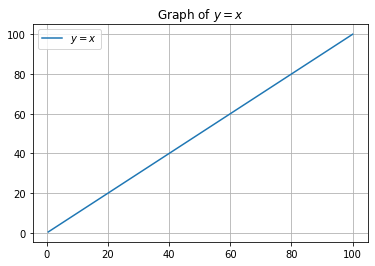

In [73]:
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(0.5, 100.0, 200)
y = x
plt.plot(x, y, label='$y=x$')
#plt.xticks(x)
plt.title('Graph of $y=x$')
plt.legend(loc='upper left')
plt.grid()
plt.show()

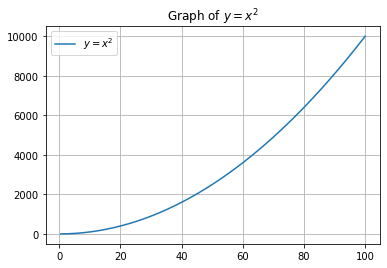

In [74]:
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(0.5, 100.0, 200)
y = x**2
plt.plot(x, y, label='$y=x^2$')
#plt.xticks(x)
plt.title('Graph of $y=x^2$')
plt.legend(loc='upper left')
plt.grid()
plt.show()

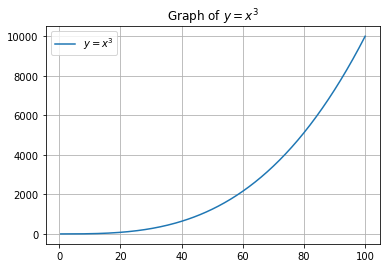

In [75]:
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(0.5, 100.0, 200)
y = (x**3)/100
plt.plot(x, y, label='$y=x^3$')
#plt.xticks(x)
plt.title('Graph of $y=x^3$')
plt.legend(loc='upper left')
plt.grid()
plt.show()

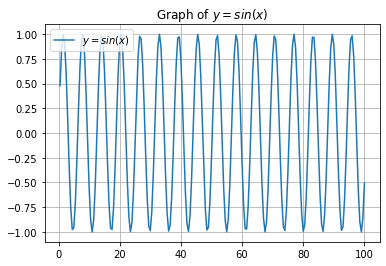

In [76]:
import matplotlib.pyplot as plt
import numpy as np
import math
x = np.linspace(0.5, 100.0, 200)
y = np.sin(x)
plt.plot(x, y, label='$y=sin(x)$')
#plt.xticks(x)
plt.title('Graph of $y=sin(x)$')
plt.legend(loc='upper left')
plt.grid()
plt.show()

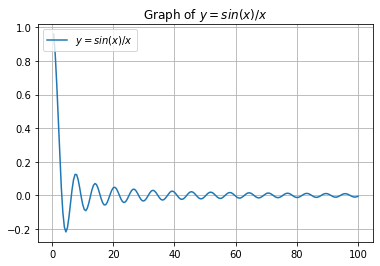

In [77]:
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(0.5, 100.0, 200)
y = np.sin(x)/x
plt.plot(x, y, label='$y=sin(x)/x$')
#plt.xticks(x)
plt.title('Graph of $y=sin(x)/x$')
plt.legend(loc='upper left')
plt.grid()
plt.show()

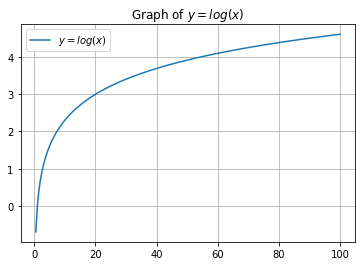

In [78]:
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(0.5, 100.0, 200)
y = np.log(x)
plt.plot(x, y, label='$y=log(x)$')
#plt.xticks(x)
plt.title('Graph of $y=log(x)$')
plt.legend(loc='upper left')
plt.grid()
plt.show()

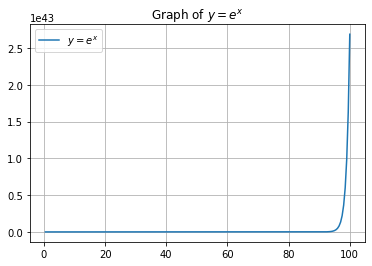

In [79]:
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(0.5, 100.0, 200)
y = np.exp(x)
plt.plot(x, y, label='$y=e^x$')
#plt.xticks(x)
plt.title('Graph of $y=e^x$')
plt.legend(loc='upper left')
plt.grid()
plt.show()

###### Answer 10:

In [69]:
import numpy as np
import pandas as pd

arr = np.random.uniform(1, 2, size=(20, 5))
df = pd.DataFrame(arr, columns=["a", "b", "c", "d", "e"])

max_std = df.std().idxmax()
print(max_std)

min_mean = df.mean(axis=1).idxmin()
print(min_mean)

c
1


###### Answer 11:

In [70]:
import numpy as np
import pandas as pd

arr = np.random.uniform(1, 2, size=(20, 7))
df = pd.DataFrame(arr, columns=["a", "b", "c", "d", "e", "f", "g"])

df['f'] = df['a'] + df['b'] + df['c'] + df['d'] + df['e']
df = df.assign(g=np.where(df['f'] < 8, 'LT8', 'GT8'))

glt8 = df.loc[df['g'] == 'LT8', 'g'].count()
print(glt8)

std_lt8 = df.loc[df['g'] == 'LT8', 'f'].std()
print(std_lt8)

std_gt8 = df.loc[df['g'] == 'GT8', 'f'].std()
print(std_gt8)

12
0.4611177726089174
0.35046306150929973


###### Answer 12:

In NumPy, "broadcasting" refers to the ability of NumPy to treat arrays of different shapes during arithmetic operations in a way that can lead to more efficient code. Here is a simple example that demonstrates broadcasting in NumPy:

In [71]:
import numpy as np

# Create a 2x3 array with all elements equal to 1
a = np.ones((2, 3))

# Create a 1x3 array with all elements equal to 2
b = np.array([2, 2, 2])

# Add the two arrays using broadcasting
c = a + b

print(c)

[[3. 3. 3.]
 [3. 3. 3.]]


In this example, the array b is "broadcast" to the shape of a during the addition operation, resulting in the element-wise addition of a and b. The output is a new array with the same shape as a and containing the sum of the corresponding elements from a and b. Broadcasting can be a powerful tool for writing efficient and concise code.

###### Answer 13:

In [72]:
import numpy as np
def argmin(array):
    mini = arr[0]
    ind = -1

    for i in range(1, len(arr)):
   
        if arr[i] < mini:
            mini = arr[i]
            ind = i
    return ind

#Comparing it with np.argmin function
arr = [3, 2, 1, 4, 5]
array1 = np.array([3, 2, 1, 4, 5])
idx = np.argmin(array1)
print(idx)
print(argmin(arr))

2
2


# The End